# INTRODUCTION

Nama : Geraldine Dewarani

Batch : RMT-019

DASHBOARD LINK : [https://public.tableau.com/views/newyork_airbnb_geraldinedewarani/Dashboard1?:language=en-US&publish=yes)%5D&:display_count=n&:origin=viz_share_link]

# PROBLEM IDENTIFICATION

## SMART Problem Statement : 

This study seeks to determine the variables impacting the pricing of Airbnb listings in New York City. By examining the links between price and several listing features such neighborhood, room type, minimum nights, and number of reviews, 

Penelitian ini bertujuan untuk menentukan variabel yang memengaruhi penetapan harga penginapan dibawah merek Airbnb di New York City. penentuan harga dilakukan dengan memeriksa hubungan antara harga dan beberapa fitur didalamnya seperti lingkungan, tipe kamar, malam minimum, dan jumlah ulasan. 

## SMART Problem Description 

SMART :


1. Specific: Identify the factors that influence the price of Airbnb listings in New York City.
2. Measurable: Analyze the relationship between the price of Airbnb listings and variables such as neighborhood, room type, minimum nights, and number of reviews.
3. Achievable: This problem statement can be addressed by using a dataset containing information on various attributes of Airbnb listings in New York City.
4. Relevant: Understanding the factors that influence the price of Airbnb listings in New York City can help hosts optimize their listings and improve their pricing strategies, as well as help potential guests make informed decisions when selecting a place to stay.
5. Time-bound: The analysis will be conducted within a reasonable time frame, taking into account the size of the dataset and the complexity of the analysis required.


## 5W + 1H Problem Description 

1. What is the distribution of Airbnb listings in New York City based on neighborhood and room type?
2. When is the busiest time of the year for Airbnb listings in New York City based on number of reviews and reviews per month?
3. Where are the most expensive Airbnb listings located in New York City based on neighborhood and room type?
4. Who are the top hosts in New York City based on the number of listings and calculated host listings count?
5. How are the prices of Airbnb listings in New York City distributed based on statistical measures ?
6. Is there a significant difference in Airbnb listing prices between neighborhoods in New York City ?

# DATA LOADING

## Import Library

In [1]:
#import library 
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install matplotlib.pyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Loading

In [3]:
#Mount data from gdrive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Importing Data SET
df = pd.read_csv('/content/drive/MyDrive/GC-H8/AB_NYC_2019.csv')

**This data was retrieved at kaggle **

Reference :      
DGOMONOV. (2019).New York City Airbnb Open Data (Version 3) [Data set]. https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb/input

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# DATA CLEANING

In [7]:
# examine missing value 
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Handling Missing Data : 
the null value identified in name, host name, last review and review per month coloumn therefore,

for name, host name that has no value, we will drop the row. it is irrelevant and insignificant to our data analysis 

for review_per_month and and last_review  column we will fill it with 0.0 for missing values. assuming that the listings have not received any reviews. 

In [8]:
# drop rows with missing 'name' and 'host_name' values
airbnbny = df.dropna(subset=['name', 'host_name'])

# fill missing 'last_review' and 'reviews_per_month' values with 0
airbnbny[['last_review', 'reviews_per_month']] = airbnbny[['last_review', 'reviews_per_month']].fillna(0)


<ipython-input-8-d88c757f85eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnbny[['last_review', 'reviews_per_month']] = airbnbny[['last_review', 'reviews_per_month']].fillna(0)


In [9]:
# examine the cleaned data 
airbnbny.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
airbnbny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# DATA EXPLORATION, ANALYSIS and CALCULATIONS

## Favorite AirBnB listing in Manhattan

What is the name of every type of room most favorite airbnb listings in manhattan based on monthly reviews ?

In [11]:
# Filter the data to only include listings in Manhattan
airbnbny_manhattan = airbnbny[airbnbny['neighbourhood_group'] == 'Manhattan']

# Group by room type and get the max reviews per month
max_reviews_manhattan = airbnbny_manhattan.groupby('room_type')['reviews_per_month'].max()

max_reviews_manhattan

room_type
Entire home/apt    14.00
Private room       58.50
Shared room        10.77
Name: reviews_per_month, dtype: float64

In [12]:
# Get the corresponding listings for each room type
most_fav_listings = []
for room_type, max_review in max_reviews_manhattan.items():
    listing = airbnbny_manhattan[(airbnbny_manhattan['room_type'] == room_type) & (airbnbny_manhattan['reviews_per_month'] == max_review)].iloc[0]
    most_fav_listings.append(listing)

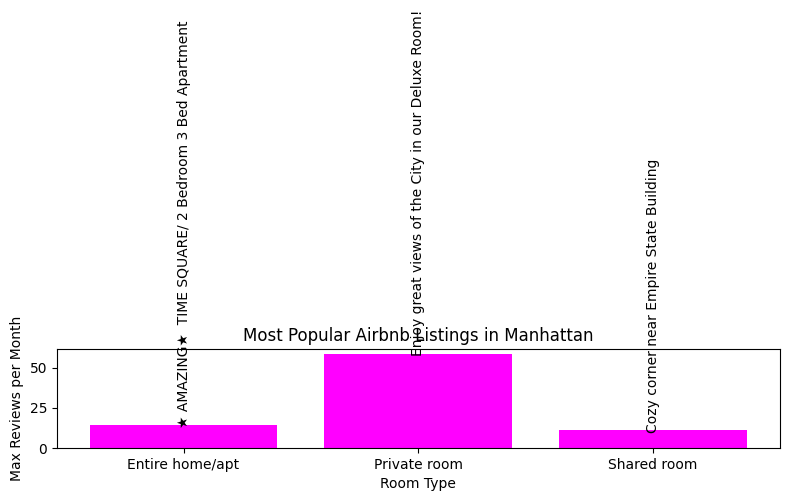

In [13]:
# Create a bar chart for each room type
fig, ax = plt.subplots(figsize=(8, 5))

room_types = max_reviews_manhattan.index.tolist()
reviews = max_reviews_manhattan.tolist()
listings = [listing['name'] for listing in most_fav_listings]

ax.bar(room_types, reviews, color='magenta')
ax.set_title('Most Popular Airbnb Listings in Manhattan')
ax.set_xlabel('Room Type')
ax.set_ylabel('Max Reviews per Month')

for i, listing in enumerate(listings):
    ax.text(i, reviews[i]+0.5, listing, ha='center', rotation=90, fontsize=10)

plt.tight_layout()
plt.show()

Based on the highest number of reviews per month, the bar chart offers information on the most beloved Airbnb accommodations in Manhattan. It demonstrates that the most common room types in Manhattan are private room and complete homes or apartments. 

"Enjoy great views of the city in our Deluxe Room" and "AMASING TIME SQUARE/ 2BR 3BED Apartment" are the top Airbnb listings for individual rooms and complete homes/apartments, as well. 

When compared to comparable listings for their respective room categories, these two listings have an outstanding diffrence in terms of the maximum amount of reviews every month. Since the most popular listings are found in the most sought-after neighborhoods of the city, the chart's overall conclusion is that location plays a significant factor in the popularity of Airbnb listings in Manhattan.


## AirBnB Peak Period 

When is the busiest time of the year for Airbnb listings in New York City based on number of reviews and reviews per month?

In [14]:
# Convert the 'last_review' column to datetime format
airbnbny['last_review'] = pd.to_datetime(airbnbny['last_review'])

# Extract the month field from the 'last_review' column
airbnbny['month_review'] = airbnbny['last_review'].dt.month

airbnbny

<ipython-input-14-cba290c3c6d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnbny['last_review'] = pd.to_datetime(airbnbny['last_review'])
<ipython-input-14-cba290c3c6d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnbny['month_review'] = airbnbny['last_review'].dt.month


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month_review
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,10
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1970-01-01,0.00,1,365,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,7
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,1970-01-01,0.00,2,9,1
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,1970-01-01,0.00,2,36,1
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1970-01-01,0.00,1,27,1
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1970-01-01,0.00,6,2,1


In [15]:
# Group the data by month and calculate the sum of reviews
reviews_by_month = airbnbny.groupby('month_review').agg({'number_of_reviews': 'sum', 'month_review': 'sum'})

# Print the result
print(reviews_by_month)


              number_of_reviews  month_review
month_review                                 
1                         30786         12803
2                          9472          1540
3                         15032          3864
4                         30588          8436
5                         94837         23500
6                        628203         81516
7                        253350         41531
8                         12817         13304
9                         14243         13815
10                        15167         15450
11                        12246         12727
12                        20336         21228


In [16]:
# Get the month with the most reviews
most_reviews_month = reviews_by_month['number_of_reviews'].idxmax()

# Print a message indicating which month had the most reviews
print(f"The busiest month for Airbnb in New York City was the month {most_reviews_month} th, with a total of {reviews_by_month.loc[most_reviews_month, 'number_of_reviews']} reviews.")


The busiest month for Airbnb in New York City was the month 6 th, with a total of 628203 reviews.


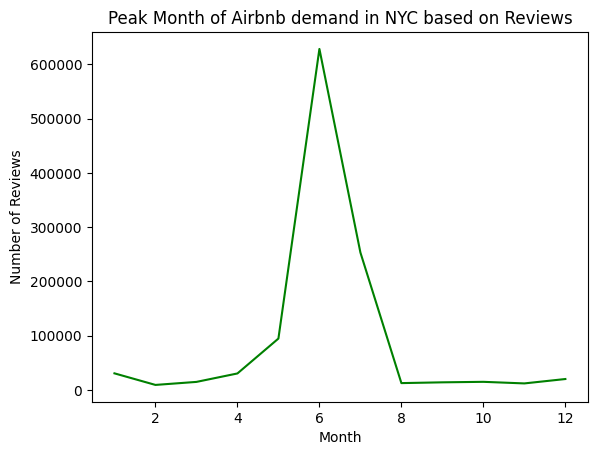

In [17]:
# Create a line chart of the sum of reviews by month
plt.plot(reviews_by_month.index, reviews_by_month['number_of_reviews'], color='green')

# Set the chart title and axis labels
plt.title('Peak Month of Airbnb demand in NYC based on Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')

# Show the chart
plt.show()

Based on the number review per month
In June, the number of reviews is significantly higher than any other month, with a total of 628,203 reviews. This could be due to the summer season and increased tourism in the city during that time.

May also has a high number of reviews with 94,837, which may indicate a peak travel period before the summer months.

Other months with relatively high numbers of reviews include July (253,350), April (30,588), and December (20,336).

In contrast, February has the lowest number of reviews with only 9,472, followed by March with 15,032. This may indicate a slower travel period during the winter months.

See this in our interactive dashboard of total booking by month and neighborhood group.

## Most expensive area in NYC

Where are the most expensive Airbnb listings located in New York City based on neighborhood and room type?

In [18]:
# Group the data by neighborhood and room type, and calculate the mean price for each group
expensive_listings = airbnbny.groupby(['neighbourhood_group', 'neighbourhood', 'room_type']).agg({'price': 'mean'})

# Sort the data in descending order based on the mean price
expensive_listings = expensive_listings.sort_values(by='price', ascending=False)

# Get the top 10 most expensive listings
top_10_expensive = expensive_listings.head(10)

top_10_expensive 


price
neighbourhood_group neighbourhood     room_type                  
Bronx               Riverdale         Private room     803.500000
                                      Shared room      800.000000
Staten Island       Fort Wadsworth    Entire home/apt  800.000000
                    Woodrow           Entire home/apt  700.000000
                    Randall Manor     Entire home/apt  651.000000
Brooklyn            Sea Gate          Entire home/apt  649.400000
Manhattan           Tribeca           Entire home/apt  561.818182
Staten Island       Prince's Bay      Entire home/apt  506.666667
Manhattan           Battery Park City Entire home/apt  490.425532
                    Flatiron District Entire home/apt  388.000000

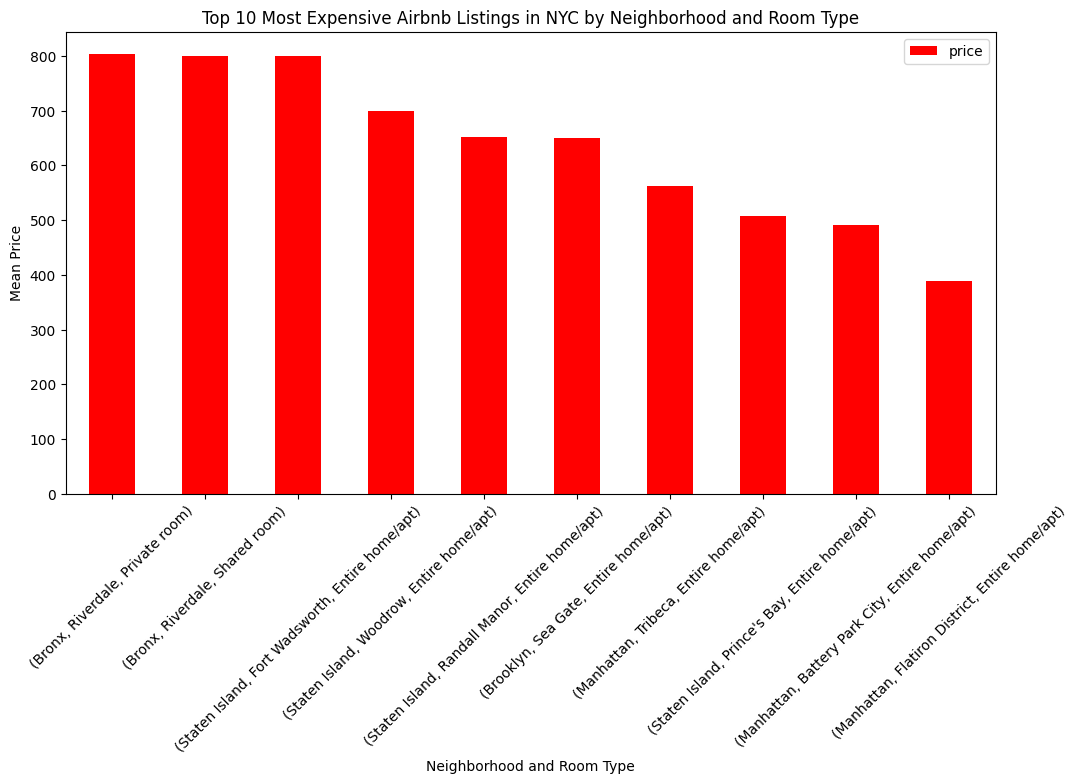

In [19]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
top_10_expensive.plot(kind='bar', ax=ax, color='red')

# Set the title and labels
ax.set_title('Top 10 Most Expensive Airbnb Listings in NYC by Neighborhood and Room Type')
ax.set_xlabel('Neighborhood and Room Type')
ax.set_ylabel('Mean Price')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Its startling that the highest average price for a private room is in Riverdale, Bronx and for a shared room is in Bronx as well. This suggests that Airbnb guests looking for a more affordable option may find better deals in other boroughs or neighborhoods.

The most expensive entire home/apartment listings in Manhattan are found in Tribeca and Battery Park City, which are both affluent and upscale neighborhoods with high-end restaurants, shopping and entertainment options. This suggests that guests looking for a luxurious stay in the heart of Manhattan may want to consider these neighborhoods.


See this in our interactive dashboard of average price in neighbourhoods room type.

## AirBnB Top Host

Who are the top hosts in New York City based on the number of listings and calculated host listings count?

In [20]:
# Group the data by host id and host name, and calculate the number of listings for each host
host_listings_count = airbnbny.groupby(['host_id', 'host_name']).agg({'id': 'count'})

# Rename the column to be more descriptive
host_listings_count = host_listings_count.rename(columns={'id': 'host_listings_count'})

# Sort the data in descending order based on the number of listings
host_listings_count = host_listings_count.sort_values(by='host_listings_count', ascending=False)

# Get the top 10 hosts with the most listings
top_10_hosts = host_listings_count.head(10)

# Display the result
print(top_10_hosts)


                             host_listings_count
host_id   host_name                             
219517861 Sonder (NYC)                       327
107434423 Blueground                         232
30283594  Kara                               121
137358866 Kazuya                             103
12243051  Sonder                              96
16098958  Jeremy & Laura                      96
61391963  Corporate Housing                   91
22541573  Ken                                 87
200380610 Pranjal                             65
1475015   Mike                                52


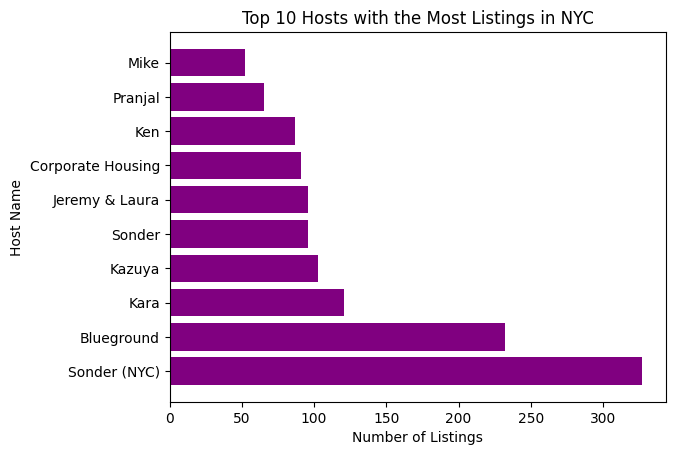

In [21]:
# Create a horizontal bar plot
plt.barh(top_10_hosts.index.get_level_values('host_name'), 
         top_10_hosts['host_listings_count'], 
         color='purple')

# Set the plot title and axis labels
plt.title('Top 10 Hosts with the Most Listings in NYC')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')

# Display the plot
plt.show()

from the barchart above we can see that Sonder (NYC) are host the most Airbnb Property in NYC. By hosting a tremendous amount of property, sonder wish to deliver hospitality that’s both remarkable and accessible. Because like their goals sonder wish that everyone should be able to afford an extraordinary place to stay.

See this on our interactive dashboard of average price in top 10 host by total reviews

## Potential pricing error in AirBnB NY Listing

In [22]:
# Calculate basic statistics of price
print(f"min accomodation price in new york {airbnbny['price'].min()}")
print(f"max accomodation price in new york {airbnbny['price'].max()}")
print(f"median accomodation price in new york {airbnbny['price'].median()}")
print(f"mean accomodation price in new york {airbnbny['price'].mean()}")
print(f"mode accomodation price in new york {airbnbny['price'].mode(0)}")
print(f"std dev accomodation price in new york {airbnbny['price'].std()}")
print(f"variance accomodation price in new york {airbnbny['price'].var()}")

min accomodation price in new york 0
max accomodation price in new york 10000
median accomodation price in new york 106.0
mean accomodation price in new york 152.74030864955586
mode accomodation price in new york 0    100
Name: price, dtype: int64
std dev accomodation price in new york 240.23238552518896
variance accomodation price in new york 57711.59905512301


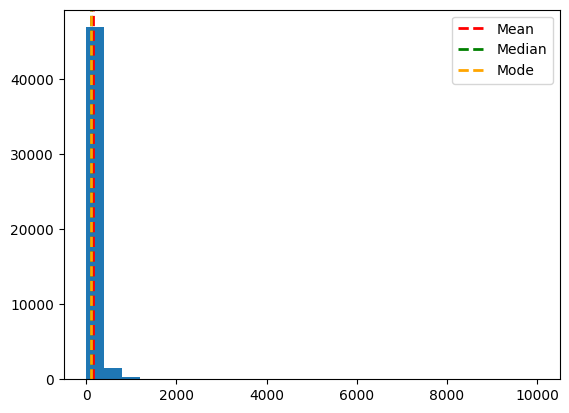

In [23]:
# Calculate the mean, median, and mode of the accommodation prices
mean_price = airbnbny['price'].mean()
median_price = airbnbny['price'].median()
mode_price = airbnbny['price'].mode()[0]

# Create a histogram of the accommodation prices
plt.hist(airbnbny['price'],bins=25)
plt.axvline(x=mean_price, color='red', label='Mean', linestyle='dashed', linewidth=2);
plt.axvline(x=median_price, color='green', label='Median', linestyle='dashed', linewidth=2);
plt.axvline(x=mode_price, color='orange', label='Mode', linestyle='dashed', linewidth=2);
plt.legend()
plt.show()

Based on the mean and median values, it seems that the distribution of accommodation prices in New York is right-skewed or positively skewed, since the mean is greater than the median. Additionally, the mode is 100, which is lower than both the mean and median, further indicating that the distribution is skewed to the right.

To identify any potential pricing errors, we can look for outliers in the price distribution. In this analysis we will use box plot and tukey's rule

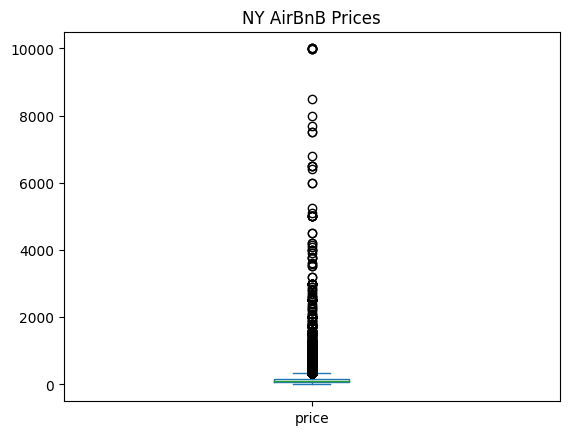

In [24]:
#boxplot
airbnbny['price'].plot(kind='box', title='NY AirBnB Prices');

looking at the box plot, we can se that there's some anomalies prices that fall far beyond the average price range. so to minimalize the anomalies data we should treat it with tukey's rule which design to treat outliers for data with unormal distribution. 

In [25]:
airbnbprice = airbnbny.copy()

In [26]:
#define q1 dan q3
q1= airbnbprice['price'].quantile(0.25)
q3= airbnbprice['price'].quantile(0.75)
q1,q3

(69.0, 175.0)

In [27]:
#tukey's rule
IQR = q3 - q1
IQR

106.0

In [28]:
# define upper and lower limit
upper_limit= q3 + 1.5*IQR
lower_limit=q1 - 1.5*IQR

print(upper_limit)
print(lower_limit)

334.0
-90.0


In [29]:
airbnbprice.shape

(48858, 17)

In [30]:
#check data above upper limit to identified any potential pricing error
airbnbprice[airbnbprice['price']>upper_limit].shape

(2971, 17)

In [31]:
#define new dataframe to store data without anomalies
airbnb_ok_price = airbnbprice[~(airbnbprice['price']>upper_limit)] 
airbnb_ok_price.shape

(45887, 17)

oke so now whenever we need to looked at a data frame that store AirBnB accomodation in NY that falls between the reasonable prices, it'll store in airbnb_ok_price dataframe. 

## Price Significancy of NY AirBnB Listing

According to The Real Deal realestate news, Manhattan is the most expensive borough in New york with highest average property sale price of $6.01 million in December 2022. In this case we want to know if there's a sifgnificant difference in the average rent rate of AirBnB per night between Manhattan and any other borough. To check whether the rent rate of city most prestigious area is the same compare with other area, we will perform the two sample two tailed and set the significance level of 0.05.

Our hypothesis on this case:

H0: μ(Manhattan) = μ(other Borough)

H1: μ(Manhattan) ≠ μ(other Borough)

In [32]:
# Filter the data to only include listings in Manhattan and other neighborhood groups
manhattan_listings = airbnbny[airbnbny['neighbourhood_group'] == 'Manhattan']
other_listings = airbnbny[airbnbny['neighbourhood_group'] != 'Manhattan']

# Group the data by neighborhood group and calculate the average listing price for each group
manhattan_price = manhattan_listings['price'].mean()
other_price = other_listings['price'].mean()

# Set the significance level
alpha = 0.05

# Perform a two-sample t-test to compare the average listing prices between Manhattan and the other neighborhood group
t_stat, p_val = stats.ttest_ind(manhattan_listings['price'], other_listings['price'])

# Print the results
print(f"Average price in Manhattan: {manhattan_price:.2f}")
print(f"Average price in other neighborhoods: {other_price:.2f}")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_val:.2f}")

# Interpret the results
if p_val < alpha:
     print("Reject H0: There is a significant difference in the average rent rate of AirBnB property between Manhattan and other borough .")
else:
    print("Fail to reject H0: There is no significant difference in the average rent rate of AirBnB property between Manhattan and other borough .")

Average price in Manhattan: 196.90
Average price in other neighborhoods: 117.62
t-statistic: 36.73
p-value: 0.00
Reject H0: There is a significant difference in the average rent rate of AirBnB property between Manhattan and other borough .


# CONCLUSION 

Based on the analysis of the Airbnb dataset for New York City, we can draw the following conclusions:
* The top 5 most favorite Airbnb listings in Brooklyn are dominated by entire homes/apartments, with one private room option. The most popular room type is private rooms, followed by entire apartment and shared rooms.
* Based on the number of review, the busiest period of the year are happen during summer season which start in June until August
* Looking at the most expensive Airbnb listings in each neighborhood, we can see that the most expensive listings are often entire homes/apartments located in affluent areas of the city, such as Riverdale in the Bronx, Fort Wadsworth in Staten Island, and Tribeca and Battery Park City in Manhattan.
* The top 10 Host who own the property, are barely have property across the neighbourhood in New York City, but from the data we know that individual who hosts the most airbnb is Wonder (NYC)
* The typical price range for Airbnb listings in New York City varies widely across neighborhoods, but the median price is around $106 per night. The most common price point is around $100 per night. The average listing price deviates from this point by about $152 per night.
* Based on another two-sample t-test comparing Manhattan to other neighborhood groups, there is a significant difference in Airbnb listing prices between Manhattan and all other neighborhood groups in New York City. 
